### Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import spacy
import contractions
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


In [2]:
df = pd.read_csv("D:\CS303\IMDB Dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2684\330805352.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\CS303\IMDB Dataset.csv")


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
positive_data = df[df.sentiment == 1]['review']
negative_data = df[df.sentiment == 0]['review']

In [5]:
import re
from bs4 import BeautifulSoup
import contractions
contractions_dict = contractions.contractions_dict

# ฟังก์ชันรวม
def clean_text(x):
    if type(x) is not str:
        return x
    
    x = x.lower()
    
    # ลบอีเมล
    email_pattern = re.compile(r"([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)")
    x = re.sub(email_pattern, '', x)
    
    # ขยาย contractions
    for key, value in contractions_dict.items():  
        x = x.replace(key, value)
    
    # ลบ HTML tags
    x = BeautifulSoup(x, 'lxml').get_text().strip()
    
    # ลบตัวอักษรพิเศษและเว้นวรรคแทน
    x = re.sub(r'[^\w]+', " ", x)
    x = ' '.join(x.split())
    
    return x

# ใช้งาน
df['review'] = df['review'].apply(clean_text)
df.head()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_2684\590096116.py:22: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  x = BeautifulSoup(x, 'lxml').get_text().strip()


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there is a family where a little boy...,negative
4,petter mattei s love in the time of money is a...,positive


In [6]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word.lower() not in stop_words])
df['review'] = df['review'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
def lemmatize_text(text):
    text = str(text)
    doc = nlp(text)
    lemmas = [token.lemma_ if token.lemma_ not in ['-PRON-', 'be'] else token.text for token in doc]
    return ' '.join(lemmas)

df['review'] = df['review'].apply(lemmatize_text)
df.head()

,review,sentiment
0,one reviewer mention watch 1 oz episode hook r...,positive
1,wonderful little production filming technique ...,positive
2,think wonderful way spend time hot summer week...,positive
3,basically family little boy jake think zombie ...,negative
4,petter mattei love time money visually stunnin...,positive


In [8]:
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['review'])

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (40000, 5000)
Test shape: (10000, 5000)


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7585
Classification Report:
               precision    recall  f1-score   support

    negative       0.74      0.78      0.76      4961
    positive       0.78      0.73      0.75      5039

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



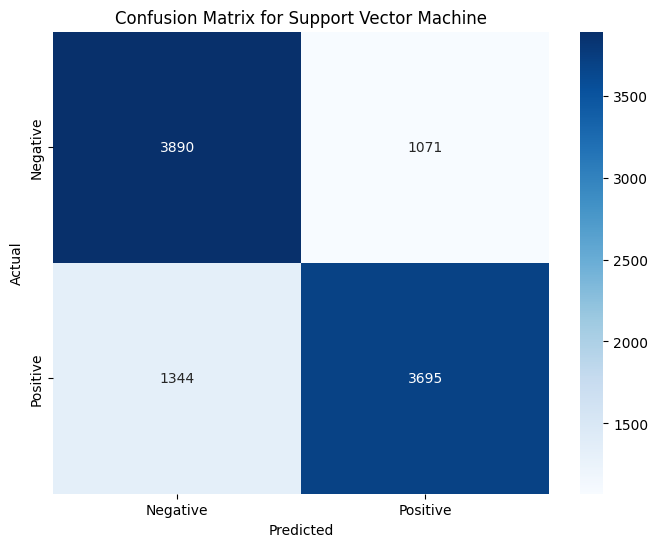

In [9]:
import seaborn as sns
svm = SVC(max_iter=1000,random_state=42)

svm_original = svm.fit(X_train, y_train)
y_pred = svm_original.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
svm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Support Vector Machine')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8791
Classification Report:
               precision    recall  f1-score   support

    negative       0.89      0.87      0.88      4961
    positive       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



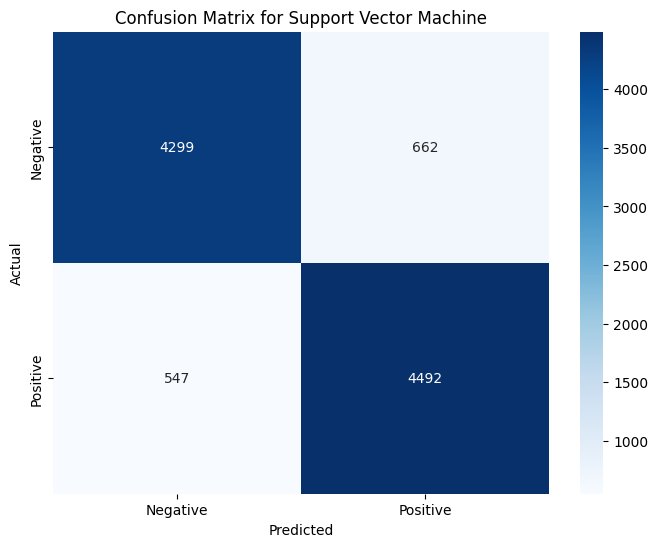

In [10]:
svm = LinearSVC(max_iter=1000,random_state=42)

svm_original = svm.fit(X_train, y_train)
y_pred = svm_original.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
svm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Support Vector Machine')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:

tfidf = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.7,
    max_features=50000,
    stop_words='english')

X = tfidf.fit_transform(df['review'])

y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (40000, 50000)
Test shape: (10000, 50000)


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7864
Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.78      0.78      4961
    positive       0.79      0.79      0.79      5039

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000



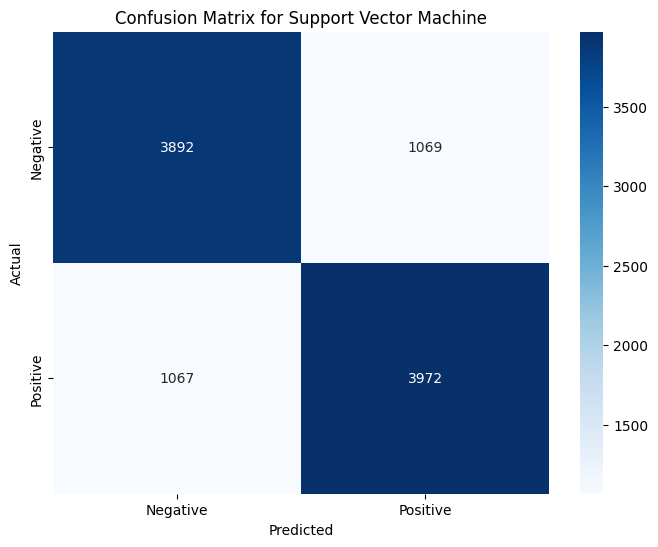

In [12]:
svm = SVC(max_iter=1000,random_state=42)

svm_original = svm.fit(X_train, y_train)
y_pred = svm_original.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
svm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Support Vector Machine')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.8976
Classification Report:
               precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



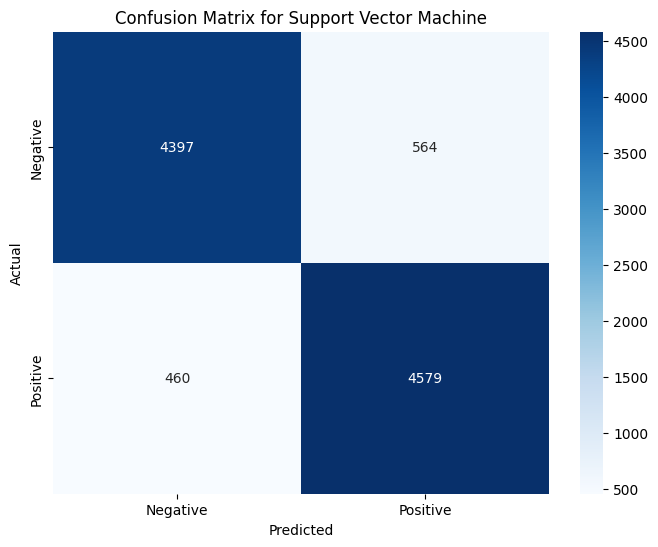

In [13]:
svm = LinearSVC(max_iter=1000,random_state=42)

svm_original = svm.fit(X_train, y_train)
y_pred = svm_original.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
svm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Support Vector Machine')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\leno

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'dual': True, 'loss': 'hinge', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 42, 'tol': 0.01}
Best Cross-Validation Accuracy: 0.8944

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      4961
    Positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



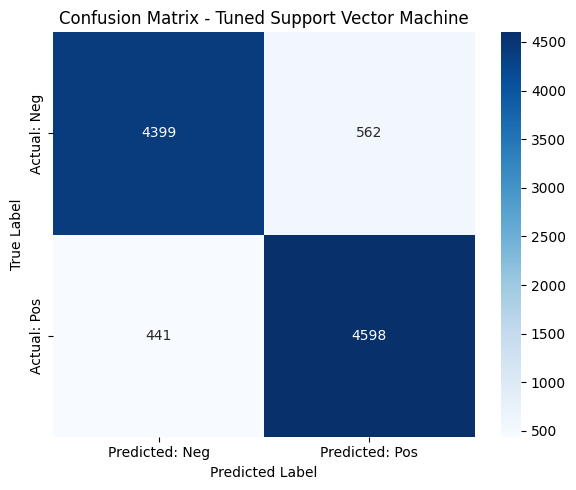

In [14]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'dual': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-4, 1e-3, 1e-2],
    'random_state': [42]
}

svm = LinearSVC(random_state=42)


grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Neg', 'Predicted: Pos'],
            yticklabels=['Actual: Neg', 'Actual: Pos'])
plt.title('Confusion Matrix - Tuned Support Vector Machine')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
